<h1>Customer Churn & Recommendation Engine

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# 2. Load data
df1 = pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')
df = df1.copy()

In [3]:
# 3. Initial inspection
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
df.describe(include='all')

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
count,350.000000,350,350.000000,350,350,350.000000,350.000000,350.000000,350,350.000000,348
unique,NaN,2,NaN,6,3,NaN,NaN,NaN,2,NaN,3
top,NaN,Female,NaN,New York,Gold,NaN,NaN,NaN,True,NaN,Satisfied
freq,NaN,175,NaN,59,117,NaN,NaN,NaN,175,NaN,125
mean,275.500000,NaN,33.597143,NaN,NaN,845.381714,12.600000,4.019143,NaN,26.588571,NaN
std,101.180532,NaN,4.870882,NaN,NaN,362.058695,4.155984,0.580539,NaN,13.440813,NaN
min,101.000000,NaN,26.000000,NaN,NaN,410.800000,7.000000,3.000000,NaN,9.000000,NaN
25%,188.250000,NaN,30.000000,NaN,NaN,502.000000,9.000000,3.500000,NaN,15.000000,NaN
50%,275.500000,NaN,32.500000,NaN,NaN,775.200000,12.000000,4.100000,NaN,23.000000,NaN
75%,362.750000,NaN,37.000000,NaN,NaN,1160.600000,15.000000,4.500000,NaN,38.000000,NaN


In [6]:
# 4. Check missing values
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [7]:
# 5. EDA (basic)
print("\nValue counts for Satisfaction Level:\n", df['Satisfaction Level'].value_counts(dropna=False))


Value counts for Satisfaction Level:
 Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
NaN              2
Name: count, dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [9]:
# One-hot encode the 'City' column
df = pd.get_dummies(df, columns=['City','Gender'], drop_first=True)

In [10]:
# 6. Handle missing values in 'Satisfaction Level'
# Fill with mode
df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0], inplace=True)

C:\Users\bhavy\AppData\Local\Temp\ipykernel_5332\3773947133.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0], inplace=True)


In [11]:
# Let's Confirm
print(df['Satisfaction Level'].value_counts(dropna=False))

Satisfaction Level
Satisfied      127
Unsatisfied    116
Neutral        107
Name: count, dtype: int64


In [12]:
# Custom ordinal encoding for Satisfaction Level
satisfaction_map = {
    'Satisfied': 2,
    'Neutral': 1,
    'Unsatisfied': 0
}
df['Satisfaction Level'] = df['Satisfaction Level'].map(satisfaction_map)

In [13]:
# Custom ordinal encoding for Membership Type
membership_map = {
    'Gold': 3,
    'Silver': 2,
    'Bronze': 1
}
df['Membership Type'] = df['Membership Type'].map(membership_map)

In [14]:
df.head()

,Customer ID,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Gender_Male
0,101,29,3,1120.20,14,4.6,True,25,2,False,False,False,True,False,False
1,102,34,2,780.50,11,4.1,False,18,1,False,True,False,False,False,True
2,103,43,1,510.75,9,3.4,True,42,0,False,False,False,False,False,False
3,104,30,3,1480.30,19,4.7,False,12,2,False,False,False,False,True,True
4,105,27,2,720.40,13,4.0,True,55,0,False,False,True,False,False,True


C:\Users\bhavy\AppData\Local\Temp\ipykernel_5332\1356827369.py:26: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bhavy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


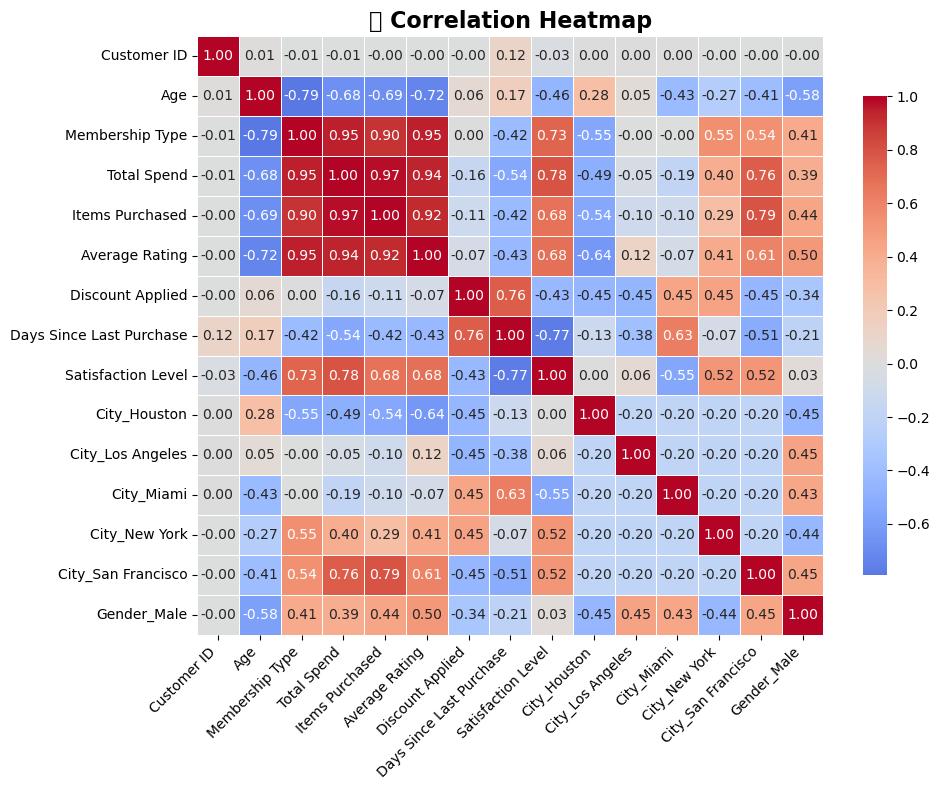

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap with annotations and formatting
sns.heatmap(
    corr,
    annot=True,                # show values
    fmt=".2f",                 # format decimals
    cmap="coolwarm",          # color scheme
    center=0,                 # midpoint
    linewidths=0.5,           # lines between cells
    linecolor='white',        # color of the lines
    cbar_kws={'shrink': 0.8}  # shrink color bar
)

# Titles and layout
plt.title("🔗 Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\bhavy\AppData\Local\Temp\ipykernel_5332\3058000711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Membership Type', palette='Set2')
C:\Users\bhavy\AppData\Local\Temp\ipykernel_5332\3058000711.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bhavy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


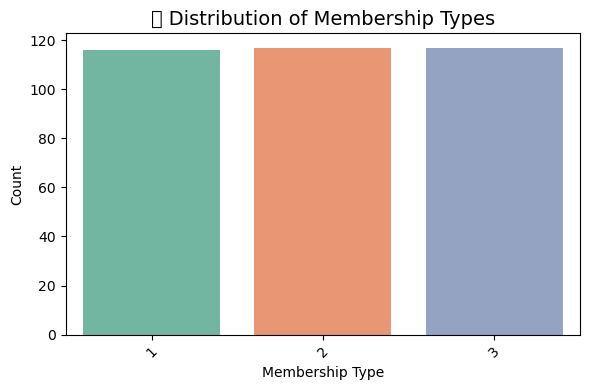

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Membership Type', palette='Set2')
plt.title("📊 Distribution of Membership Types", fontsize=14)
plt.xlabel("Membership Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

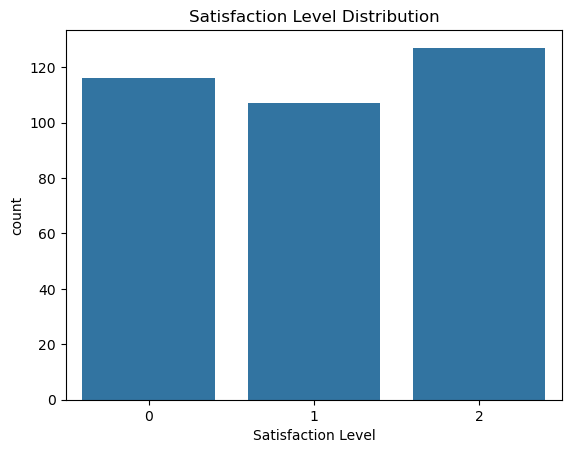

In [17]:
# Plot categorical features (example: Satisfaction Level)
sns.countplot(data=df, x='Satisfaction Level')
plt.title("Satisfaction Level Distribution")
plt.show()

In [18]:
df = df.drop(['Customer ID'],axis=1)
df.head()

,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Gender_Male
0,29,3,1120.20,14,4.6,True,25,2,False,False,False,True,False,False
1,34,2,780.50,11,4.1,False,18,1,False,True,False,False,False,True
2,43,1,510.75,9,3.4,True,42,0,False,False,False,False,False,False
3,30,3,1480.30,19,4.7,False,12,2,False,False,False,False,True,True
4,27,2,720.40,13,4.0,True,55,0,False,False,True,False,False,True


In [19]:
# 8. Feature Engineering
# We will use features like 'Age', 'Gender', 'City', 'Membership Type', 'Satisfaction Level', 'Days Since Last Purchase', etc.
X = df.drop('Total Spend', axis=1)  # Features
y = df['Total Spend']  # Target

In [20]:
# 9. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# 10. Train the model - Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# 11. Make predictions
y_pred = model.predict(X_test)

In [23]:
# 12. Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Model Evaluation:
Mean Absolute Error: 4.136399024365308
Mean Squared Error: 87.91297468503066
R-squared: 0.9993498362519804


In [24]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
Membership Type             0.631476
Items Purchased             0.159154
Average Rating              0.138979
Gender_Male                 0.023260
Age                         0.015922
City_San Francisco          0.013204
Days Since Last Purchase    0.008312
Discount Applied            0.004297
City_Los Angeles            0.001940
Satisfaction Level          0.001827
City_Miami                  0.000938
City_New York               0.000514
City_Houston                0.000177
dtype: float64


C:\Users\bhavy\AppData\Local\Temp\ipykernel_5332\100914334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


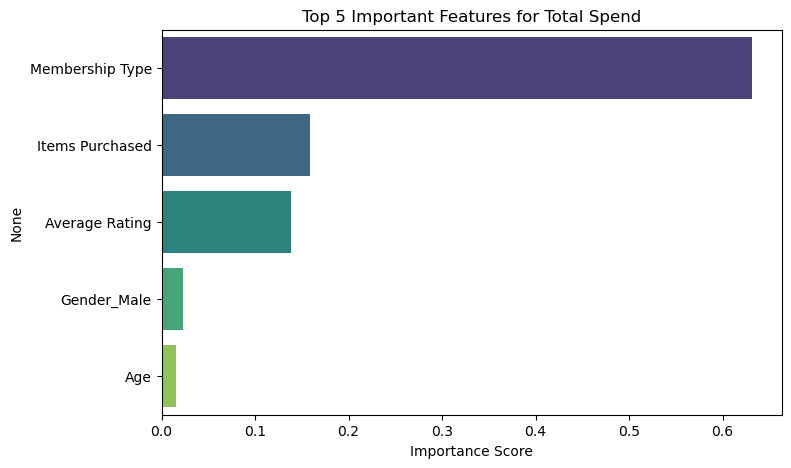

In [25]:
top_features = feature_importance.head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 5 Important Features for Total Spend")
plt.xlabel("Importance Score")
plt.show()


<h1>🔍 Key Insights from Feature Importance (Random Forest)</h1>

<ol>
  <li>
    <strong>Membership Type dominates:</strong> 
    <br>
    With a massive importance of <strong>~63%</strong>, the <code>Membership Type</code> is the strongest predictor of <code>Total Spend</code>. This makes intuitive sense — premium members (Gold) are likely to spend more.
  </li>

  <li>
    <strong>Items Purchased & Average Rating:</strong> 
    <br>
    These two behavioral variables contribute nearly <strong>30%</strong> combined:
    <ul>
      <li>More items = more spending (obvious driver).</li>
      <li>Higher average ratings may reflect positive experiences, encouraging higher future spend.</li>
    </ul>
  </li>

  <li>
    <strong>Gender has minimal impact:</strong> 
    <br>
    <code>Gender_Male</code> holds only <strong>~2.3%</strong> importance, suggesting gender isn't a significant predictor of total spend.
  </li>

  <li>
    <strong>Age & Days Since Last Purchase:</strong> 
    <br>
    These features show small but measurable importance — potentially useful for targeting age-based segments or reactivation campaigns.
  </li>

  <li>
    <strong>City contributes very little:</strong> 
    <br>
    Surprisingly, all cities combined contribute less than <strong>2%</strong>, indicating location has minimal impact compared to customer behavior and membership level.
  </li>

  <li>
    <strong>Satisfaction Level is a weak predictor:</strong> 
    <br>
    Despite being sentiment-based, <code>Satisfaction Level</code> shows very low feature importance. It may be more relevant in churn or loyalty models.
  </li>
</ol>


<hr>

<h1>Recommendation Engine (Mini Version)</h1>
<li>Here we will focus on Collaborative Filtering using a user-item matrix based on the data we have, specifically the Items Purchased and Average Rating columns.</li>
<h3>Steps to Build the Collaborative Filter:</h3>
<ol>
    <li><b>Data Preparation:</b>
<ul><li>We'll assume that "Items Purchased" can be treated as item IDs and that customers rate items (with ratings in the "Average Rating" column). We'll create a user-item matrix from this.</li></ul> </li>
    <li><b>Collaborative Filtering using Cosine Similarity:</B>
<ul><li>We'll compute the similarity between users based on their ratings of items using Cosine Similarity. This will help us recommend items that similar users have rated highly.</li></ul> </li>
</ol>



In [29]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
# Sample data (assuming your dataset looks like this)
df_filtered = df1[['Customer ID', 'Items Purchased', 'Average Rating']]

In [31]:
# 2. Create the User-Item Matrix
user_item_matrix = df_filtered.pivot_table(index='Customer ID', columns='Items Purchased', values='Average Rating')

# Fill NaN with 0 (indicating that the user has not rated the item)
user_item_matrix = user_item_matrix.fillna(0)

In [32]:
# 3. Compute the Cosine Similarity between users
cosine_sim = cosine_similarity(user_item_matrix)

In [33]:
# Convert the similarity matrix into a DataFrame for easier manipulation
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

In [34]:
# 4. Create a function to get recommendations for a specific customer
def get_recommendations(customer_id, cosine_sim_df, user_item_matrix, top_n=5):
    # Get similar users to the target customer
    similar_users = cosine_sim_df[customer_id].sort_values(ascending=False)[1:]  # Exclude the target customer
    
    # Get the items that the similar users have rated highly
    recommended_items = {}
    for user, similarity in similar_users.items():
        user_ratings = user_item_matrix.loc[user]
        for item, rating in user_ratings[user_ratings > 0].items():
            if item not in recommended_items:
                recommended_items[item] = rating * similarity  # Weight by similarity
    
    # Sort the items based on recommendation score (weighted sum of ratings)
    recommended_items = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)
    
    # Return top N recommended items
    return recommended_items[:top_n]

In [35]:
# 5. Mapping the item IDs to random names
item_name_mapping = {
    7: "Wireless Headphones",
    8: "Smart Watch",
    9: "Gaming Console",
    10: "Bluetooth Speaker",
    11: "4K TV",
    12: "Smartphone",
    13: "Laptop",
    14: "Tablet",
    15: "Air Conditioner",
    16: "Coffee Machine",
    17: "Electric Scooter",
    18: "Fitness Tracker",
    19: "Digital Camera",
    20: "VR Headset",
    21: "Portable Power Bank"
}

# 6. Example: Get recommendations for a customer
customer_id = 101
recommendations = get_recommendations(customer_id, cosine_sim_df, user_item_matrix)

# Map item IDs to item names
recommendations_with_names = [(item_name_mapping[item_id], score) for item_id, score in recommendations]

print(f"Recommendations for Customer {customer_id}: {recommendations_with_names}")

Recommendations for Customer 101: [('Tablet', 4.4), ('Portable Power Bank', 0.0), ('Laptop', 0.0), ('Wireless Headphones', 0.0), ('Air Conditioner', 0.0)]
